In [17]:
# this program classifies MNIST handwritten digits

! pip install tensorflow keras numpy mnist matplotlib
! pip install pyyaml h5py

In [18]:
# import packages 

import numpy as np
import mnist # our data set
import matplotlib.pyplot as plt # graph
from keras.models import Sequential # ANN architecture
from keras.layers import Dense # layers
from keras.utils import  to_categorical 

In [19]:
# load data set

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [20]:
# normalize the images pixels from ([0, 255] to [-0.5, 0.5])

train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5

# flatten the images. 28x28 image into 28^2 = 784 dimensional vector
# to pass into neural network

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# print the shape to check

print(train_images.shape)
print(test_images.shape)


(60000, 784)
(10000, 784)


In [21]:
# build a model with 3 layers
# 2 layers with 64 neurons and the relu function
# 1 layer with 10 neurons amd softmax function 

model=  Sequential()
model.add(Dense(64, activation='relu', input_dim = 784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
# compile the model
# the loss funasures how good the model did on trainingction me
# and improve using optimizer

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy', # this allows us to use classes that are greater than 2
    metrics = ['accuracy']
)

In [23]:
# train model

model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 6, # the number of iterations over the entire dataset 5
    batch_size=32
)

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3482 - accuracy: 0.8956
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1798 - accuracy: 0.9453
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1403 - accuracy: 0.9577
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1179 - accuracy: 0.9639
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1019 - accuracy: 0.9683
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0928 - accuracy: 0.9708


In [24]:
# evaluate the model

model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.1228 - accuracy: 0.9649


[0.1227933019399643, 0.964900016784668]

In [25]:
model.save('model.h5')

In [26]:
# predict on the 1st 5 test images

prediction = model.predict(test_images[:15])
print(np.argmax(prediction, axis=1))
print(test_labels[:15])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]


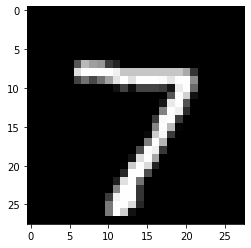

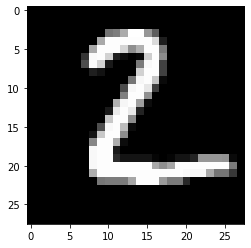

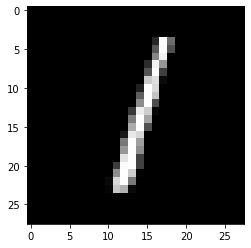

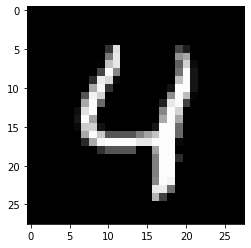

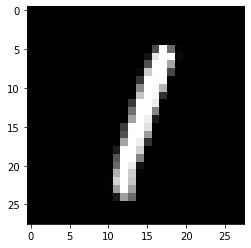

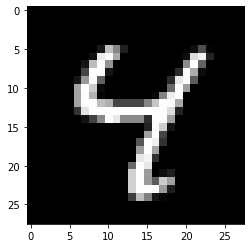

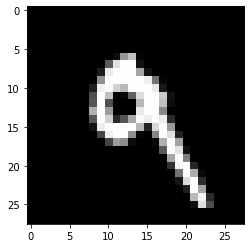

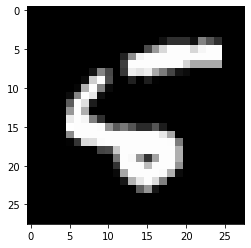

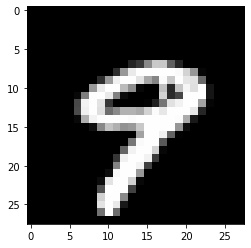

In [27]:
for i in range(10): #to see the images
  first_image = test_images[i]
  first_image = np.array(first_image, dtype ='float')
  pixels = first_image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()